In [8]:
import numpy as np 
from numpy import matlib
# import cvxpy
import matplotlib.pyplot as plt

import nengo 
from nengo.dists import Choice 
from nengo.utils.ensemble import tuning_curves
from nengo.utils.matplotlib import rasterplot
from nengo.neurons import Direct

# import tensorflow as tf
import gym
import pickle 

import pdb


In [9]:
def LIF(X, tau_rc=0.02, tau_ref=0.0):
    f = np.zeros_like(X)
    x = X - 1
    f[x>0] = 1.0/(tau_ref + tau_rc * np.log1p(1.0 / x[x>0]))
    return f 

In [19]:
X = np.arange(-2.0,2.0,0.01)
F = LIF(X)

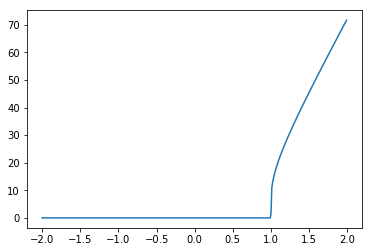

In [20]:
plt.figure()
plt.plot(X,F)
plt.show()

In [12]:
def invLIF(F, tau_rc=0.02, tau_ref=0.0):
    X_pos = np.zeros_like(F)
    X_neg = np.zeros_like(F)
    X = np.zeros_like(F)
    X_pos[F>0] = 1.0/(np.exp((1.0/F[F>0]-tau_ref)*(1/tau_rc))-1) + 1.0
    X_neg[F<0] = 1.0/(np.exp((-1.0/F[F<0]-tau_ref)*(1/tau_rc))-1) + 1.0
    X_neg *= -1.0
    X += X_pos + X_neg
#     pdb.set_trace()
    return X

In [17]:
X_ = invLIF(F)
F_ = LIF(X_)

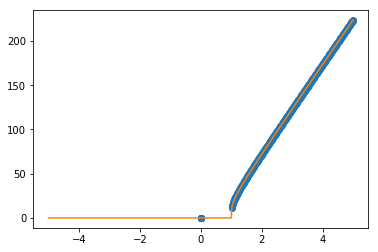

In [18]:
plt.figure()
plt.plot(X_, F_, 'o')
plt.plot(X,F)
plt.show()